**Столбчатая диаграмма** — это график в виде вертикальных или горизонтальных столбцов, высота или длина каждого из которых пропорциональна \
соответствующим им значениям.
С помощью столбчатых диаграмм удобно визуально оформлять категориальные данные — информацию, распределённую по дискретным группам (категориям). \
Например, возрастные группы людей, месяцы, размеры, виды животных и т. д..

**Установка необходимых библиотек**

In [ ]:
pip install pandas matplotlib seaborn plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Подготовка данных**

In [ ]:
import pandas as pd


file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Проверка первых нескольких строк данных
data.head()

,Date,Apple,Samsung,Xiaomi,Other
0,2024-06,27.16,23.72,11.92,37.20
1,2024-07,27.75,23.56,11.80,36.89
2,2024-08,27.71,23.58,12.13,36.58
3,2024-09,27.61,22.90,11.80,37.69
4,2024-10,28.38,22.82,10.62,38.18


1. Построение столбчатой диаграммы с использованием библиотеки **Matplotlib**

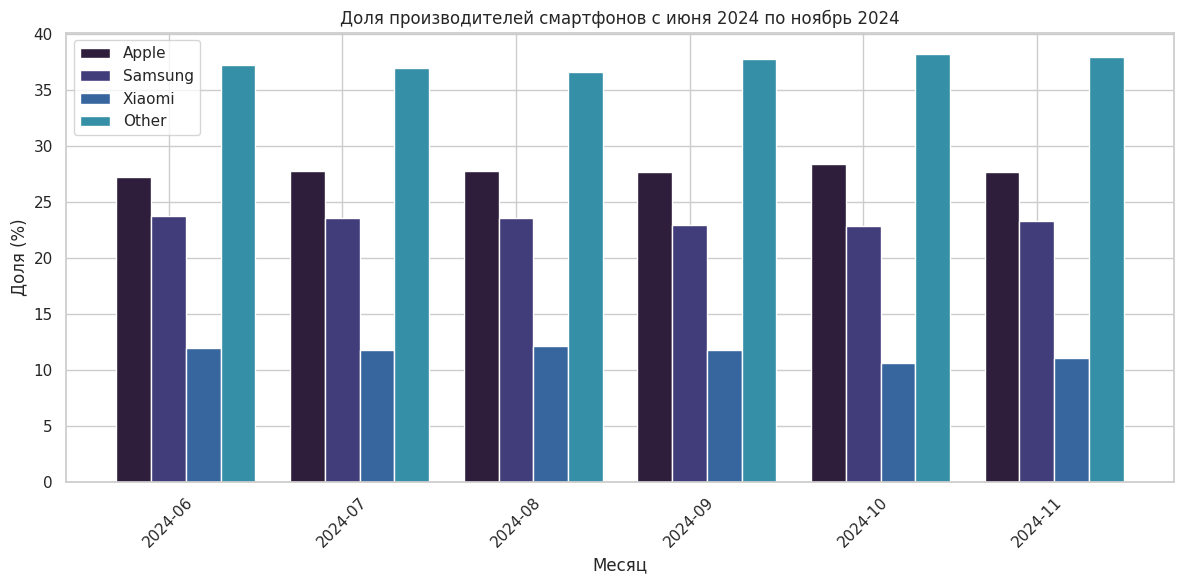

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных из CSV
file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
df = pd.read_csv(file_path)

# Установка индекса по дате
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

plt.figure(figsize=(12,6))

# Настройка параметров для многорядной столбчатой диаграммы
bar_width = 0.2
x = np.arange(len(df))  # Позиции по оси x для месяцев

# Построение столбцов для каждой марки
plt.bar(x - bar_width, df['Apple'], width=bar_width, label='Apple')
plt.bar(x, df['Samsung'], width=bar_width, label='Samsung')
plt.bar(x + bar_width, df['Xiaomi'], width=bar_width, label='Xiaomi')
plt.bar(x + 2 * bar_width, df['Other'], width=bar_width, label='Other')

# Настройка графика
plt.xlabel('Месяц')
plt.ylabel('Доля (%)')
plt.title('Доля производителей смартфонов с июня 2024 по ноябрь 2024')
plt.xticks(x, df.index.strftime('%Y-%m'), rotation=45)  # Форматирование меток по оси x
plt.legend()  # Отображение легенды

# Отображение графика
plt.tight_layout()
plt.show()



2. Построение столбчатой диаграммы с использованием библиотеки **Seaborn**

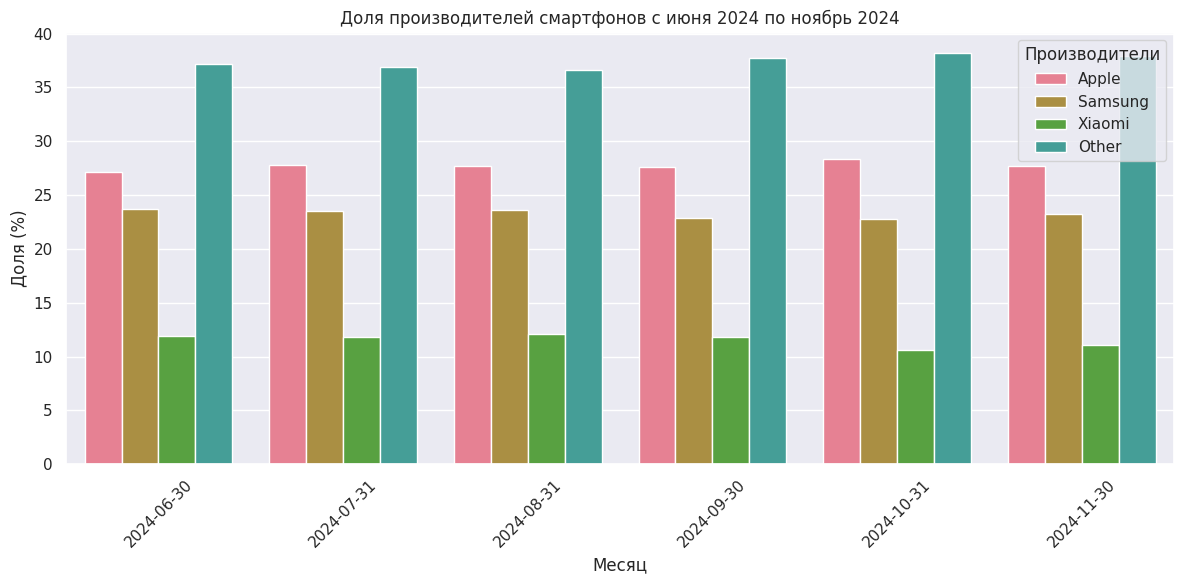

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Установка 'Date' в качестве индекса
data.set_index('Date', inplace=True)

# Группировка данных по месяцу и суммирование значений
monthly_data = data.resample('ME').sum().reset_index()

# Настройка стиля Seaborn
sns.set(style="darkgrid")

sns.set_palette("husl")

# Преобразование данных в длинный формат для Seaborn
monthly_data_melted = monthly_data.melt(id_vars='Date', var_name='Vendor', value_name='Sales')

# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data_melted, x='Date', y='Sales', hue='Vendor')

# Настройка заголовка и меток осей
plt.title('Доля производителей смартфонов с июня 2024 по ноябрь 2024')
plt.xlabel('Месяц')
plt.ylabel('Доля (%)')
plt.xticks(rotation=45)
plt.legend(title='Производители')

# Отображение графика
plt.tight_layout()
plt.show()


3. Построение столбчатой диаграммы с использованием библиотеки **Plotly**

In [22]:
import pandas as pd
import plotly.express as px

# Загрузка данных из CSV файла
file_path = 'https://raw.githubusercontent.com/Leshka60/-Homework_in_Urban/main/Diploma%20project/vendor-ww-monthly.csv'
data = pd.read_csv(file_path)

# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])

# Установка 'Date' в качестве индекса
data.set_index('Date', inplace=True)

# Группировка данных по месяцу и суммирование значений
monthly_data = data.resample('ME').sum().reset_index()

# Преобразование данных в длинный формат для Plotly
monthly_data_melted = monthly_data.melt(id_vars='Date', var_name='Vendor', value_name='Sales')

# Построение столбчатой диаграммы
fig = px.bar(monthly_data_melted, x='Date', y='Sales', color='Vendor',
             title='Доля производителей смартфонов с июня 2024 по ноябрь 2024',
             labels={'Sales': 'Доля (%)', 'Date': 'Месяц', 'Vendor': 'Производитель'},
             text='Sales')

# Настройка отображения значений на столбцах
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Отображение графика
fig.show()
